In [1]:
run /home/keir/Software/lya_emulator/main.py /share/data2/keir/Simulations /home/keir/Plots/Emulator refinement_tight_validation2 /home/keir/Data/emulator


/share/apps/anaconda/python3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 5)
Beginning to initialise LikelihoodClass at 2018-10-19 10:22:09.726522
Looking for spectra in /share/data2/keir/Simulations/refinement_tight_validation/ns0.97As2.2e-09heat_slope0.05heat_amp1hub0.69/output
Found spectra in None
Found spectra in None
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270aed27f0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfda7f0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b26d02d4240>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfe1048>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfe1588>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfe1d68>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfe8278>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfe83c8>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bfe8748>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b270bff5080>
Found spectra i

Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a696208>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a696a58>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a696ba8>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a69b438>
Looking for spectra in /share/data2/keir/Simulations/refinement_tight/ns1As2.9e-09heat_slope0.44heat_amp1.1hub0.61/output
Found spectra in None
Found spectra in None
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a69bf28>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a69b940>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a69b4a8>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a6ac208>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a6ac588>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a6ac6a0>
Found spectra in <fake_spectra.spectra.Spectra object at 0x2b287a6ace10>
Found spectra in <fake_spectra.

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s03  0007  -1.859318e+04   9.386430e+04 
    00s10  0022  -1.874122e+04   4.524070e-01 
    00s15  0032  -1.874140e+04   1.513062e-01 
    00s18  0040  -1.874141e+04   3.016262e-04 
    00s39  0100  -1.874141e+04   3.018089e-04 
Runtime:     00s39
Optimization status: Converged


Name : GP regression
Objective : -18741.40697789487
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  sum.linear.variances     |  1.9100790119502417e-06  |      +ve      |        
  sum.rbf.variance         |      12.629830154624292  |      +ve      |        
  sum.rbf.lengthscale      |       4.253197163476929  |      +ve      |        
  Gaussian_noise.variance  |  3.4778296967284195e-15  |      +ve      |        
  linear.    |  value  |  constraints  |  priors
  variances  |    1.0  |      

In [ ]:
run /home/keir/Software/lya_emulator/main.py /home/keir/Data/emulator /home/keir/Plots/Emulator hot_cold_training3_rescale_2000 /home/keir/Data/emulator

In [2]:
#import multiprocessing as mu
#import corner as co
#import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
posterior_samples = np.loadtxt('/home/keir/Data/emulator/AA0.97BB1.3_chain_refinement_tight_validation2.txt')

In [5]:
output[0].param_limits

array([[-2.50e-01,  2.50e-01],
       [ 7.50e-01,  1.25e+00],
       [ 8.00e-01,  1.05e+00],
       [ 1.20e-09,  3.00e-09],
       [-5.00e-01,  5.00e-01],
       [ 5.00e-01,  1.50e+00],
       [ 6.00e-01,  8.00e-01]])

In [22]:
n_process = 55
n_parameters = 7
n_marginalised_parameters = 2

#optimisation_bounds_unscaled = np.array([[0.81, 1.], [1.3e-9, 2.9e-9], [-0.44, 0.44], [0.56, 1.4], [0.61, 0.79]]) #Convex hull_0
#optimisation_bounds_unscaled = np.array([[0.825, 1.], [1.4e-9, 2.8e-9], [-0.385, 0.385], [0.615, 1.35], [0.62, 0.78]]) #Convex hull_1
optimisation_bounds_unscaled = np.array([[0.84, 1.], [1.5e-9, 2.7e-9], [-0.33, 0.33], [0.67, 1.3], [0.63, 0.77]]) #Convex hull_2
#optimisation_bounds_unscaled = np.array([[0.915, 0.985], [1.5e-9, 2.5e-9], [-0.2, 0.2], [0.8, 1.3], [0.65, 0.73]]) #Edge
#optimisation_bounds_unscaled = np.array([[0.93, 0.98], [1.5e-9, 2.5e-9], [-0.2, 0.2], [0.9, 1.3], [0.655, 0.725]]) #4s
print(optimisation_bounds_unscaled)
optimisation_bounds_array = np.zeros_like(optimisation_bounds_unscaled)
optimisation_bounds_array[:, 0] = map_to_unit_cube(optimisation_bounds_unscaled[:, 0], output[0].param_limits[n_marginalised_parameters:])
optimisation_bounds_array[:, 1] = map_to_unit_cube(optimisation_bounds_unscaled[:, 1], output[0].param_limits[n_marginalised_parameters:])

#optimisation_bounds_array = np.ones((n_parameters - n_marginalised_parameters, 2))
#optimisation_bounds_array[:, 0] *= 1.e-7
#optimisation_bounds_array[:, 1] *= 1. - 1.e-7

print(optimisation_bounds_array)
optimisation_bounds = [tuple(optimisation_bounds_array[i]) for i in range(n_parameters - n_marginalised_parameters)]
print(optimisation_bounds)

starting_positions = np.array([npr.uniform(low=optimisation_bounds_array[:, 0], high=optimisation_bounds_array[:, 1]) for i in range(n_process)])
#print(starting_positions)


[[ 8.4e-01  1.0e+00]
 [ 1.5e-09  2.7e-09]
 [-3.3e-01  3.3e-01]
 [ 6.7e-01  1.3e+00]
 [ 6.3e-01  7.7e-01]]
[[0.16       0.8       ]
 [0.16666667 0.83333333]
 [0.17       0.83      ]
 [0.17       0.8       ]
 [0.15       0.85      ]]
[(0.1599999999999997, 0.7999999999999998), (0.16666666666666666, 0.8333333333333335), (0.16999999999999998, 0.8300000000000001), (0.17000000000000004, 0.8), (0.15000000000000008, 0.8499999999999999)]


In [23]:
import multiprocessing as mg
mg.set_start_method('forkserver', force=True)

import acquisition as ac

#starting_positions = 1.e-7 + npr.rand(n_process, n_parameters - n_marginalised_parameters) * (1. - 2.e-7)
#optimisation_bounds = [(1.e-7, 1. - 1.e-7) for i in range(n_parameters - n_marginalised_parameters)]
#integration_bounds = [list(output[0].param_limits[0]), list(output[0].param_limits[1])]
integration_bounds = [[-0.05, 0.1], [0.92, 1.02]]
argument_list = [(starting_positions[i], output[0], optimisation_bounds, 0.02, 1., integration_bounds) for i in range(n_process)]

pool_instance = mg.Pool(n_process)
optimisation_output = pool_instance.map(ac.optimise_acquisition_function_parallel, argument_list)

[print(map_from_unit_cube(optimisation_output[i].x, output[0].param_limits[n_marginalised_parameters:])) for i in range(n_process)]


[9.49947679e-01 2.28344608e-09 9.40878784e-02 9.21267144e-01
 7.08531550e-01]
[9.47126018e-01 2.34184400e-09 7.59151372e-02 9.56501216e-01
 6.83883633e-01]
[9.52083390e-01 2.30639370e-09 1.17039794e-01 9.32994394e-01
 7.02454273e-01]
[9.49163321e-01 2.31292930e-09 8.19220186e-02 9.38664213e-01
 6.96347360e-01]
[9.47169014e-01 2.34208704e-09 7.65916762e-02 9.56694232e-01
 6.83786124e-01]
[9.47136811e-01 2.34228019e-09 7.56519553e-02 9.56245878e-01
 6.83979155e-01]
[ 1.00000000e+00  2.70000000e-09 -8.18734861e-02  6.70000000e-01
  7.70000000e-01]
[9.51395992e-01 2.34129678e-09 1.09238217e-01 9.52362793e-01
 6.89576708e-01]
[9.49069136e-01 2.31233014e-09 8.13628469e-02 9.38640298e-01
 6.96373948e-01]
[ 9.83835527e-01  1.53454631e-09 -1.12806218e-01  1.30000000e+00
  6.61313132e-01]
[ 9.83826422e-01  1.53457828e-09 -1.12879347e-01  1.30000000e+00
  6.61319870e-01]
[9.51446397e-01 2.34153550e-09 1.09136255e-01 9.52417639e-01
 6.89594921e-01]
[9.47169276e-01 2.34209852e-09 7.60257344e-02 9.5

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
[print(optimisation_output[i].fun) for i in range(n_process)]

[print(map_from_unit_cube(starting_positions[i], output[0].param_limits[n_marginalised_parameters:])) for i in range(n_process)]

best_process = np.argmin(np.array([optimisation_output[i].fun for i in range(n_process)]))
print(best_process, map_from_unit_cube(optimisation_output[best_process].x, output[0].param_limits[n_marginalised_parameters:]))


1399.5988939061021
1400.0944381860168
1398.7392966823695
1398.780684139622
1400.0945463576447
1400.094605352518
1475.0403684338892
1398.7545341571329
1398.780499850644
1394.7312348643613
1394.7312277032213
1398.754650314577
1400.0944263655056
1398.7398775007757
1400.0944032940124
1400.330639625289
1398.75481897334
1401.3929074052587
1399.5987657392754
1398.7807881149176
1400.0944150559358
1401.392788798645
1398.781489786753
1398.7404165766416
1394.731343168873
1398.7394579842578
1398.7807469966917
1398.780508421239
1399.5978030902882
1469.6206087754806
1398.7807044176616
1398.780465437976
1400.0947513225747
1398.7394928423469
1400.0945308190153
1398.7805834902092
1398.739703236588
1400.0957187339125
1398.7806400521235
1398.7805307765454
1398.754520152439
1469.6206087754806
1400.0946356061079
1394.9721427947095
1401.3926035410386
1400.0948217237851
1400.0944587667884
1398.7804694769995
1396.2175695670167
1398.7807273043984
1398.780611319118
1400.0944050070345
1400.0946887642688
1398.780

In [4]:
p_lims = np.array([[-2.50e-01,  2.50e-01],
       [ 7.50e-01,  1.25e+00],
       [ 8.00e-01,  1.05e+00],
       [ 1.20e-09,  3.00e-09],
       [-5.00e-01,  5.00e-01],
       [ 5.00e-01,  1.50e+00],
       [ 6.00e-01,  8.00e-01]])

print(p_lims)

[[-2.50e-01  2.50e-01]
 [ 7.50e-01  1.25e+00]
 [ 8.00e-01  1.05e+00]
 [ 1.20e-09  3.00e-09]
 [-5.00e-01  5.00e-01]
 [ 5.00e-01  1.50e+00]
 [ 6.00e-01  8.00e-01]]


In [10]:
random_width = 0.05 * (p_lims[2:, 1] - p_lims[2:, 0])
print(random_width)

random_gauss = np.random.normal(scale=random_width)
print(random_gauss)

print(np.array([9.83826422e-01, 1.53457828e-09, -1.12879347e-01, 1.30000000e+00, 6.61319870e-01]))
print(np.array([9.83826422e-01, 1.53457828e-09, -1.12879347e-01, 1.30000000e+00, 6.61319870e-01]) + random_gauss)


[1.25e-02 9.00e-11 5.00e-02 5.00e-02 1.00e-02]
[ 2.86897103e-03 -1.06743178e-10  9.76225824e-03  4.17398787e-02
 -7.66855872e-03]
[ 9.83826422e-01  1.53457828e-09 -1.12879347e-01  1.30000000e+00
  6.61319870e-01]
[ 9.86695393e-01  1.42783510e-09 -1.03117089e-01  1.34173988e+00
  6.53651311e-01]


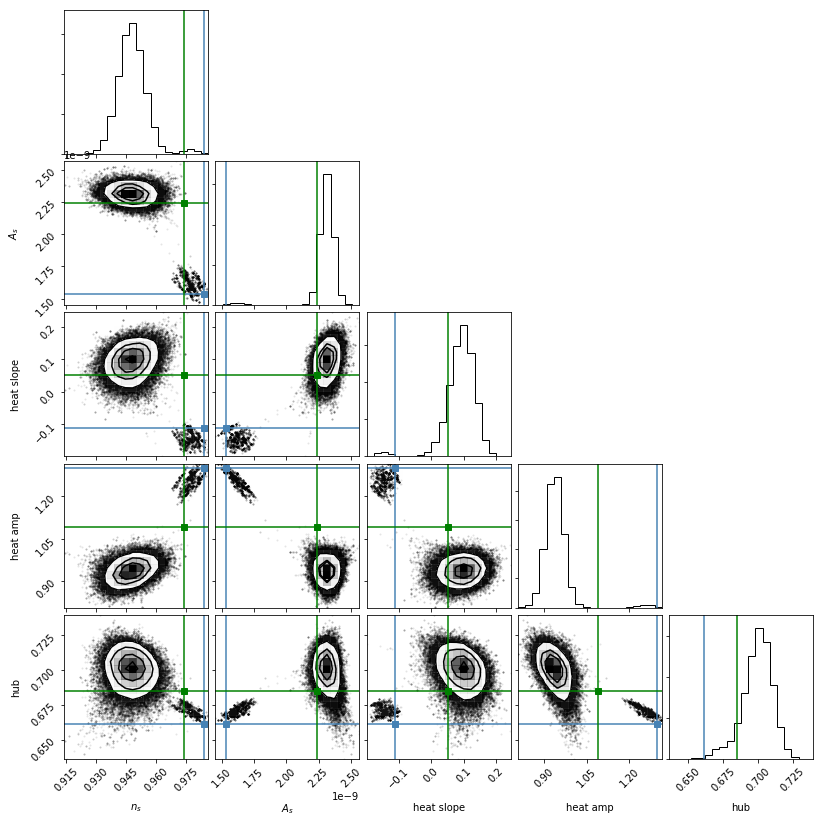

In [25]:
import corner as co

corner_plot_labels = [r'$d\tau_0$', r'$\tau_0$', r'$n_s$', r'$A_s$', 'heat slope', 'heat amp', 'hub']

figure = co.corner(posterior_samples[:, n_marginalised_parameters:], labels=corner_plot_labels[n_marginalised_parameters:], truths=np.concatenate(([], map_from_unit_cube(optimisation_output[best_process].x, output[0].param_limits[n_marginalised_parameters:]))))

###Add truths
# Extract the axes
value1 = [0.974, 2.24e-09, 0.0509, 1.09, 0.685]
ndim = n_parameters - n_marginalised_parameters
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")
    #ax.axvline(value2[i], color="r")

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        #ax.axvline(value2[xi], color="r")
        ax.axhline(value1[yi], color="g")
        #ax.axhline(value2[yi], color="r")
        ax.plot(value1[xi], value1[yi], "sg")
        #ax.plot(value2[xi], value2[yi], "sr")


In [ ]:
acquisition_function_tau0_amp = output.make_grid_acquisition_function(1, 2, samples=30000, nu=1., exploitation_weight=0.)
acquisition_function_tau0_amp[acquisition_function_tau0_amp == 0.] = np.nan

In [ ]:
acquisition_function_tau0_amp_exploit = output.make_grid_acquisition_function(0, 2, samples=1000, nu=0., exploitation_weight=1.)
acquisition_function_tau0_amp_exploit[acquisition_function_tau0_amp_exploit == 0.] = np.nan

In [ ]:
plt.contour(np.log10(acquisition_function_tau0_amp).T, 100, extent=[0.75, 1.25, 0.8, 1.2], origin='image')
plt.colorbar()

In [ ]:
plt.imshow(np.exp(acquisition_function_tau0_amp).T, extent=[-0.25, 0.25, 0.8, 1.2])
plt.colorbar()

In [ ]:
plt.figure(figsize=(18, 18))
plt.imshow(np.exp(acquisition_function_tau0_amp_exploit - np.nanmax(acquisition_function_tau0_amp_exploit)).T, extent=[-0.25, 0.25, 0.8, 1.2])
plt.colorbar()
#plt.scatter(0.95, 0.95, color='red')

In [ ]:
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.95,]), nu=1., exploitation_weight=0.)
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.9,]), nu=1., exploitation_weight=0.)
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([1.,]), nu=1., exploitation_weight=0.)

In [ ]:
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.95,]), nu=1., exploitation_weight=1.)
acquisition_function_exploit = output.acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.95,]), nu=0., exploitation_weight=1.)


In [ ]:
output[0].acquisition_function_GP_UCB_marginalised_mean_flux(np.array([0.81,]), nu=1., exploitation_weight=None)


In [ ]:
print(np.mean(output[0]._get_emulator_error_averaged_mean_flux(np.array([0.81,]))))

_ = output[0].likelihood(np.array([0., 0.95, 0.81]))
print(np.mean(output[0].emulated_flux_power_std[0]))

print(np.mean(output[0].emulated_flux_power_std[0]) / np.mean(output[0].emulated_flux_power[0]))

In [ ]:
output.cur_results.flatchain.shape

In [ ]:
output.cur_results.get_lnprob(np.array([0., 0.95, 0.95]))

In [ ]:
print(posterior_samples.shape)

In [ ]:
histogram_output = sb.kdeplot(posterior_samples[:, 2]).get_lines()[0].get_data()

In [ ]:
histogram_output = plt.hist(posterior_samples[:, 2], bins='auto', normed=True, histtype='step', log=True)
print(histogram_output)
plt.axvline(x=0.92)


In [ ]:
print(histogram_output[0].shape)
print(histogram_output[1].shape)
print(histogram_output)

In [ ]:
#n_samples = 200
parameter_samples = (histogram_output[1][:-1] + histogram_output[1][1:]) / 2. #np.linspace(output[0].param_limits[2, 0], output[0].param_limits[2, 1], num=n_samples)
acquisition_function_exploit_array = np.zeros_like(parameter_samples)
for i in range(parameter_samples.shape[0]):
    acquisition_function_exploit_array[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(np.array([parameter_samples[i],]), nu=1., exploitation_weight=None)


In [ ]:
#n_samples = 200
parameter_samples2 = histogram_output[0] #np.linspace(output[0].param_limits[2, 0], output[0].param_limits[2, 1], num=n_samples)
acquisition_function_exploit_array2 = np.zeros_like(parameter_samples2)
for i in range(parameter_samples2.shape[0]):
    acquisition_function_exploit_array2[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(np.array([parameter_samples2[i],]), nu=1., exploitation_weight=None)


In [ ]:
plt.plot(parameter_samples2, np.log(histogram_output[1] / np.max(histogram_output[1])))
plt.xlim([0.89, 1.11])
plt.ylim([-2.5, 0.1])

In [ ]:
plt.plot(parameter_samples2, 100*acquisition_function_exploit_array2[:parameter_samples2.shape[0]])
plt.axvline(x=0.9, color='black', ls=':')
plt.axvline(x=1., color='black', ls=':')
plt.axvline(x=1.1, color='black', ls=':')
plt.xlim([0.89, 1.11])
plt.ylim([0., 0.2])

In [ ]:
plt.plot(parameter_samples2, np.log(histogram_output[1] / np.max(histogram_output[1])), label=r'Exploitation term')
plt.plot(parameter_samples2, 100*acquisition_function_exploit_array2[:parameter_samples2.shape[0]], label=r'Exploration term')
plt.plot(parameter_samples2, np.log(histogram_output[1] / np.max(histogram_output[1])) + 100.*acquisition_function_exploit_array2[:parameter_samples2.shape[0]], label=r'GP-UCB acquisition function')

plt.legend(frameon=False)
#plt.axvline(x=0.9, color='black', ls=':')
plt.axvline(x=0.92, color='blue', ls=':')
plt.axvline(x=0.925, color='green', ls=':')
#plt.axvline(x=0.95, color='black', ls=':')
plt.xlim([0.89, 0.95])
plt.ylim([-0.1, 0.2])
plt.xlabel(r'heat amp')

In [ ]:
output[0].param_limits[0] = np.array([-0.24, 0.24])
print(output[0].param_limits)
output[0].log_likelihood_marginalised_mean_flux(np.array([0.95,]), integration_method='Monte-Carlo', integration_options=6000)


In [ ]:
#output[0].param_limits[0] = np.array([-0.007, 0.007])
#output[0].param_limits[1] = np.array([0.948, 0.952])

integration_bounds = [[-0.08, 0.08], [0.936, 0.964]]

#mmh.dps = 50
integration_instance = mmh.calculus.quadrature.GaussLegendre
print(integration_instance)

likelihood_marginalised = np.zeros(10)
exploration_term = np.zeros_like(likelihood_marginalised)
#parameter_samples = np.linspace(output[0].param_limits[2, 0] + 0.01, output[0].param_limits[2, 1], num=likelihood_marginalised.shape[0], endpoint=False)
parameter_samples = np.linspace(0.912, 0.928, num=likelihood_marginalised.shape[0])
for i in range(likelihood_marginalised.shape[0]):
    parameter_vector = np.array([parameter_samples[i],])
    #likelihood_marginalised[i] = output[0].log_likelihood_marginalised_mean_flux(np.array([parameter_samples[i],]), integration_method='Quadrature', integration_options=integration_instance)
    likelihood_marginalised[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(parameter_vector, nu=0., integration_options='gauss-legendre', integration_bounds=integration_bounds)
    exploration_term[i] = output[0].acquisition_function_GP_UCB_marginalised_mean_flux(parameter_vector, exploitation_weight=None, nu=1.e4)


In [ ]:
plt.scatter(parameter_samples, likelihood_marginalised)


In [ ]:
plt.scatter(parameter_samples, likelihood_marginalised - np.nanmax(likelihood_marginalised))
plt.scatter(parameter_samples, exploration_term, color='red')
plt.plot(histogram_output[0], np.log(histogram_output[1] / np.nanmax(histogram_output[1])), color='blue')
plt.axvline(x=0.92)
plt.xlim([0.89, 0.95])
plt.ylim([-0.2, 0.2])

In [ ]:
plt.scatter(parameter_samples, likelihood_marginalised - np.nanmax(likelihood_marginalised), color='red')
#sb.kdeplot(posterior_samples[:, 2])
plt.plot(histogram_output[0], np.log(histogram_output[1] / np.nanmax(histogram_output[1])))
plt.axvline(x=0.92, color='black')
plt.xlim([0.91, 0.93])
plt.ylim([-0.01, 0.01])

In [ ]:
plt.scatter(parameter_samples, np.exp(likelihood_marginalised - np.nanmax(likelihood_marginalised)), color='red')
#sb.kdeplot(posterior_samples[:, 2])
plt.plot(histogram_output[0], histogram_output[1] / np.nanmax(histogram_output[1]))
plt.axvline(x=0.92, color='black')
plt.xlim([0.8, 1.2])

In [ ]:
integration_bounds = [[-0.08, 0.08], [0.936, 0.964]]

acquisition_optimisation = output[0].optimise_acquisition_function(np.array([1.1,]), optimisation_bounds=[(0.81, 1.19),], nu=0., integration_bounds=integration_bounds)


In [ ]:
print(acquisition_optimisation.x)
print(acquisition_optimisation.success)
print(acquisition_optimisation.message)

In [ ]:
parameter_truth = np.array([0., 0.95, 0.975, 2.25e-09, 0.08333333333333326, 0.9166666666666666, 0.6916666666666667])

In [ ]:
optimisation_bounds = [tuple(output[0].param_limits[i]) for i in range(parameter_truth.shape[0])]
print(optimisation_bounds)
optimisation_bounds_unit_cube = [(1.e-7, 1. - 1.e-7) for i in range(parameter_truth.shape[0] - 2)]
print(optimisation_bounds_unit_cube)


In [ ]:
integration_bounds = [[-0.2, 0.2], [0.85, 1.05]]

#parameter_truth = parameter_truth * 1.01
#print(parameter_truth)
#parameter_truth_unit_cube = map_to_unit_cube(parameter_truth, output[0].param_limits)
parameter_truth_unit_cube = 1.e-7 + npr.rand(5) * (1. - 2.e-7)
print(parameter_truth_unit_cube)

def likelihood_function(parameter_vector):
    print(parameter_vector, map_from_unit_cube(parameter_vector, output[0].param_limits[2:]))
    likelihood_evaluation = -1. * output[0].log_likelihood_marginalised_mean_flux(map_from_unit_cube(parameter_vector, output[0].param_limits[2:]), integration_bounds=integration_bounds)
    print(likelihood_evaluation)
    return likelihood_evaluation

#acquisition_optimisation = spo.minimize(likelihood_function, parameter_truth_unit_cube, bounds=optimisation_bounds_unit_cube, options={'disp': True})
acquisition_optimisation = spo.basinhopping(likelihood_function, parameter_truth_unit_cube, minimizer_kwargs={'bounds': optimisation_bounds_unit_cube, 'options': {'disp': True}}, disp=True)

print(acquisition_optimisation.x)
print(acquisition_optimisation.success)
print(acquisition_optimisation.message)

print(map_from_unit_cube(acquisition_optimisation.x, output[0].param_limits[2:]))
#print(map_from_unit_cube(acquisition_optimisation.x, output[0].param_limits) - parameter_truth)

In [ ]:
pool_instance.close()
#pool_instance.join()
del pool_instance

n_process = 8

integration_bounds = [[-0.2, 0.2], [0.85, 1.05]]

def likelihood_function(parameter_vector):
    #print(parameter_vector, map_from_unit_cube(parameter_vector, output[0].param_limits[2:]))
    likelihood_evaluation = -1. * output[0].log_likelihood_marginalised_mean_flux(map_from_unit_cube(parameter_vector, output[0].param_limits[2:]), integration_bounds=integration_bounds)
    #print(likelihood_evaluation)
    return likelihood_evaluation

def optimisation_function(optimisation_arguments):
    false_number, parameter_truth_unit_cube = optimisation_arguments

    acquisition_optimisation = spo.minimize(likelihood_function, parameter_truth_unit_cube, bounds=optimisation_bounds_unit_cube, options={'disp': False})
    #print(acquisition_optimisation.success)
    #print(acquisition_optimisation.message)
    return acquisition_optimisation.x
#acquisition_optimisation = spo.basinhopping(likelihood_function, parameter_truth_unit_cube, minimizer_kwargs={'bounds': optimisation_bounds_unit_cube, 'options': {'disp': True}}, disp=True)

optimisation_arguments_list = [(0., 1.e-7 + npr.rand(5) * (1. - 2.e-7)) for i in range(n_process)]
print(optimisation_arguments_list)
pool_instance = mu.Pool(n_process)
optimisation_results = pool_instance.map(optimisation_function, optimisation_arguments_list)


In [ ]:
[-5.86448758e-02  9.64476445e-01  9.88091992e-01  2.40207473e-09
  1.30284380e-01  1.06729539e+00  6.91094030e-01]
[-6.73717605e-02  9.79216137e-01  9.86009810e-01  2.36946453e-09
  1.88449411e-01  9.78980755e-01  6.89627409e-01]
[-7.77305181e-03  9.28751149e-01  9.89338079e-01  2.24040312e-09
 -1.96653971e-02  1.28341469e+00  6.88152784e-01]

In [ ]:
[9.92761335e-01 2.42336688e-09 3.53231102e-02 1.24026185e+00
 6.90070110e-01]
[9.98922713e-01 1.78991408e-09 2.00561918e-01 8.91035270e-01
 7.16109410e-01]
[1.01805673e+00 1.55893077e-09 3.39285232e-01 8.39858390e-01
 7.28723550e-01]
[ 9.76096007e-01  2.27948154e-09 -2.11387489e-01  1.32066491e+00
  6.88386399e-01]

In [ ]:
import numpy as np
from scipy import optimize
from multiprocessing import Pool
#del emcee
import scipy
import numpy.linalg as npl
import corner

def square(x):
    print(x)
    print(np.linalg.pinv(np.eye(2)))
    return np.sum(x**2+ 2*x)

def minimize(args):
    f,x = args
    res = optimize.minimize(f, x, method = 'L-BFGS-B')
    return res.x

x = np.random.rand(8,10)

args = [(square,x[i]) for i in range(8)]
p = Pool(8)
p.map(minimize,args)

In [ ]:
#from scipy import optimize
#from multiprocessing import Pool
#import multiprocessing
#multiprocessing.set_start_method('forkserver')

n_process = 1
n_parameters = 7

output[0].random_function = 1.

class FunctionClass(object):
    def __init__(self):
        pass

    def function_evaluation(self, parameters):
        #return np.sum(parameters**2+ 2*parameters)
        #return output[0].random_function
        print('Evaluating likelihood function')
        tau0_factors = mflux.mean_flux_slope_to_factor(output[0].zout, parameters[0])
        emulator_output = (output[0].gpemu.kf, output[0].gpemu.nk, output[0].gpemu.nz, output[0].gpemu.coreg)
        emulator_output2 = (output[0].gpemu.gps[0].params, output[0].gpemu.gps[0].param_limits, output[0].gpemu.gps[0].intol, output[0].gpemu.gps[0]._test_interp, output[0].gpemu.gps[0].coreg)
        emulator_output3 = (output[0].gpemu.gps[0].scalefactors, output[0].gpemu.gps[0].paramzero)
        parameters_unit_cube = map_to_unit_cube(parameters[1:], output[0].gpemu.gps[0].param_limits)
        #numpy_output = np.linalg.pinv(np.eye(2))
        #emulator_output4 = output[0].gpemu.gps[0].gp.optimize(messages=True)
        #.predict(parameters_unit_cube.reshape(1, -1))
        #emulator_output2 = output[0].gpemu.gps[0].predict(parameters[1:].reshape(1, -1))
        #function_predicted, function_std = output[0].gpemu.predict(np.array(parameters[1:]).reshape(1, -1), tau0_factors=tau0_factors)
        #full_output = output[0].likelihood(parameters)
        print('Finished evaluating likelihood function')
        #full_output = output[0].get_BOSS_covariance_single_z(output[0].zout[0])
        #full_output = output[0].
        #print(full_output)
        full_output = 1.
        return np.mean(full_output)

function_class_instance = FunctionClass()

def optimisation_function(parameter_vector):
    print('parameter_vector =', parameter_vector)
    #eturn np.sum(parameter_vector**2+ 2*parameter_vector)
    return function_class_instance.function_evaluation(parameter_vector)
    #return output[0].random_function
    #return -1. * output[0].likelihood(parameter_vector)
    #return -1. * output[0].log_likelihood_marginalised_mean_flux(parameter_vector)

def get_prior_limits():
    #prior_limits = np.ones((5, 2))
    #prior_limits[:, 0] *= -1.5
    #prior_limits[:, 1] *= -0.5
    #return prior_limits
    return output[0].param_limits[7 - n_parameters:]

def get_optimisation_function(x):
    print('x in get_optimisation_function =', x)
    #prior_limits = np.ones((5, 2))
    #prior_limits[:, 0] *= -1.5
    #prior_limits[:, 1] *= -0.5
    prior_limits = get_prior_limits()
    x_unscaled = map_from_unit_cube(x, prior_limits)
    print('x_unscaled in get_optimisation_function =', x_unscaled)
    return optimisation_function(x_unscaled)
    #return np.sum(x_unscaled**2+ 2*x_unscaled)
    #return output[0].log_likelihood_marginalised_mean_flux(x_unscaled)

def minimize(args):
    x_bounds = [[1.e-7, 1. - 1.e-7] for i in range(n_parameters)] #For unit hypercube
    f, x = args
    res = spo.minimize(f, x, method = 'L-BFGS-B', bounds=x_bounds, options={'disp': True})
    return res.x

x = 1.e-7 + np.random.rand(n_process, n_parameters) * (1. - 2.e-7) #Starting positions
print('x (starting positions) =', x)

args = [(get_optimisation_function, x[i]) for i in range(n_process)]
p = mu.Pool(n_process)
optimisation_result = p.map(minimize, args)
#optimisation_result = list(map(minimize, args)) #p.
print('optimisation_result =', optimisation_result)

optimisation_result_rescaled = [map_from_unit_cube(optimisation_result[i], get_prior_limits()) for i in range(n_process)]
print('optimisation_result_rescaled =', optimisation_result_rescaled)
print(np.array(optimisation_result) - np.array(x))


In [ ]:
list(map(minimize, args))

In [ ]:
output[0].gpemu.gps